<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

This workflow builds upon the process of developing a model for differentiating between pictures of cats and dogs. The source code and documentation is from https://docs.fast.ai/tutorial.vision.html.

We can use `nbdev` to seamlessly generate Python module and documentation from your experimental notebook. From this point onwards, all section represents one step, i.e., a newly modified version or an addition to your notebook from the previous step.

## Step 1 - Experimental Notebook

At this stage, the notebook is mostly for experimenting with ideas and code. The notebook itself can just be as following:  

- Install `fastai` library
- Download PETS dataset which include images of cats and dogs
- Construct dataloader from dataset
- Fine-tune pretrained model

### Notebook Content

In [ ]:
!pip install fastai

In [ ]:
# Import from fastai
from fastai.vision.all import *

In [ ]:
# Download PETS dataset
path = untar_data(URLs.PETS)
path.ls()

(#2) [Path('/home/nghivo/.fastai/data/oxford-iiit-pet/images'),Path('/home/nghivo/.fastai/data/oxford-iiit-pet/annotations')]

In [ ]:
# Extract images
files = get_image_files(path/"images")
len(files)

7390

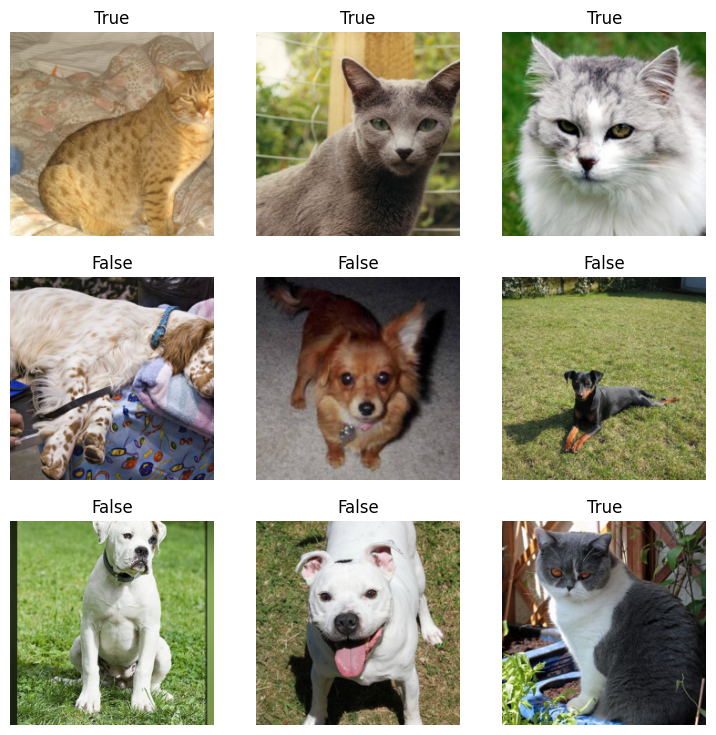

In [ ]:
# Create dataset loader
def label_func(f): return f[0].isupper()
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))
dls.show_batch()

In [ ]:
# Fine-tune model from pretrained
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /home/nghivo/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████████████████████████████████████████████████████████████████████████| 83.3M/83.3M [00:07<00:00, 11.6MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.150972,0.024604,0.008796,00:22


epoch,train_loss,valid_loss,error_rate,time
0,0.057303,0.012587,0.005413,00:28


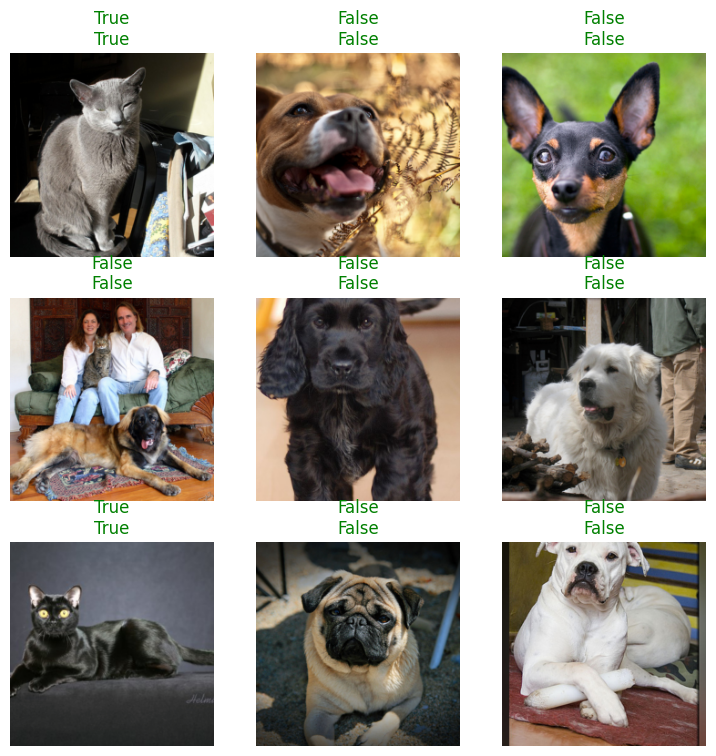

In [ ]:
learn.show_results()

In [ ]:
# Predict a single image
learn.predict(files[0])

('False', tensor(0), tensor([1.0000e+00, 9.0949e-08]))

## Step 2 - Refine & Modularize Code

At this stage, suppose the developer wants to create a function that generates a predictor for single image classification between cats and dogs. The notebook now mostly involves modularizing the existing code into reusable functions, including the following:

- Class for Cat/Dog image classifier
- Function for generating from pretrained model
- Function for predicting a single image  
- Use case with test  

**NOTE**  
In this workflow, OOP (Object-Oriented Programming) is used for modularizing the code. However,it is entirely possible that we use functional programming instead. It is also possible that we skip this step and export this script as it is.

### Notebook Content

#### Experimental notebook...

#### Module

In [ ]:
# Import from fastai
from fastai.vision.all import *

In [ ]:
# Original code from https://docs.fast.ai/examples/app_examples.html
# Class for Cat/Dog image
class CatOrDogImageClassifier:
    "Classifier between cat and dog images"
    
    def __init__(
        self,
        arch=resnet34,  # Pretrained model architecture
        metrics=error_rate,  # Metrics to be used
    ):
        "Generate classifier from pretrained model"
    
        # Form dataset loader
        set_seed(99, True)
        path = untar_data(URLs.PETS)/'images'
        dls = ImageDataLoaders.from_name_func(
            path, get_image_files(path), valid_pct=0.2,
            label_func=lambda x: x[0].isupper(), item_tfms=Resize(224))

        # Create and fine-tune learner
        learner = vision_learner(dls, arch, metrics=metrics).to_fp16()
        learner.fine_tune(1)
        self.learner = learner
        
    def predict(self, file_path: str):
        "Predict a single image with the learner"

        # Extract prediction with learner
        img = PILImage.create(file_path)
        prediction = self.learner.predict(img)
        label = 'Cat' if prediction[0]=='True' else 'Dog'
        dog_prob = prediction[2][0].item()
        cat_prob = prediction[2][1].item()
        
        # Print the results
        print(f"The animal in this picture is: {label}")
        print(f"Probability of 'Dog': {dog_prob:.6f}")
        print(f"Probability of 'Cat': {cat_prob:.6f}")
        
        # Return the results
        return label, dog_prob, cat_prob

In [ ]:
# Use case
classifer = CatOrDogImageClassifier()
label, dog_prob, cat_prob = classifer.predict("images/cat.jpg")

# Image should be predicted as 'Cat'
assert label=='Cat'
assert cat_prob > 0.5

epoch,train_loss,valid_loss,error_rate,time
0,0.147156,0.022813,0.008119,00:16


epoch,train_loss,valid_loss,error_rate,time
0,0.051962,0.031823,0.011502,00:20


The animal in this picture is: Cat
Probability of 'Dog': 0.000073
Probability of 'Cat': 0.999927


## Step 3 - Export Module

At this stage, the developer needs to export these functions for future usage. `nbdev` provides an easy option for turning the written code in Jupyter Notebook into installable Python module. The export will involve multiple files, including the previous notebook. The changes to be made are as follows:

- Add all external libraries to `setting.ini`  
- Add `#| default_exp <name>` to notebook to export into a new file with similar name
- Add `#| export` to all relevant cells in notebook  
- Use `nbdev_export` in CLI or add Jupyter Notebook cell for exporting with `nbdev.nbdev_export()`  
- Check the exported module
- Install exported module in developer mode with `pip install -e '.[dev]'` (if not already)
- Use the exported module with `from nbdev_test.<name> import *`

**NOTE**  
If encountering errors in importing the new module, try:  
- Running `pip install -e .` again  
- Restarting Jupyter notebook or Python kernel  
- Running `nbdev_prepare` in CLI

### Change in `setting.ini`

All external libraries are to be added into the `setting.ini` file. In this workflow, we are only using `fastai` library version `2.7.17`. To set this requirement in `setting.ini`, we need to add a line for requirement (or uncommenting the default requirement line):

```
### Optional ###
requirements = fastai
```

If we want to specify version (recommended to avoid future compatibility issues), we can set this to:
```
requirements = fastai==2.7.17
```

or
```
requirements = fastai>=2.7.17
```

If there are new libraries, add them to the same line, separated by '<SPACE>'. For example:
```
requirements = fastai pandas
```

### Notebook Content

#### Experimental notebook...

#### Module

In [1]:
#| echo: false
#| output: asis
show_doc(CatOrDogImageClassifier)

---

[source](https://github.com/ninjalabo/nbdev-test/blob/main/nbdev_test/classifer.py#L59){target="_blank" style="float:right; font-size:smaller"}

### CatOrDogImageClassifier

>      CatOrDogImageClassifier (arch=<function resnet34>, metrics=<function
>                               error_rate>)

*Classifier between cat and dog images*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| arch | function | resnet34 | Pretrained model architecture |
| metrics | function | error_rate | Metrics to be used |

In [ ]:
# NOTE: it is not required to export this use case with test.
# Use case
classifer = CatOrDogImageClassifier()
label, dog_prob, cat_prob = classifer.predict("images/cat.jpg")

# Image should be predicted as 'Cat'
assert label=='Cat'
assert cat_prob > 0.5

epoch,train_loss,valid_loss,error_rate,time
0,0.147156,0.022813,0.008119,00:13


epoch,train_loss,valid_loss,error_rate,time
0,0.051962,0.031823,0.011502,00:17


The animal in this picture is: Cat
Probability of 'Dog': 0.000073
Probability of 'Cat': 0.999927


In [ ]:
# Export via cell
from nbdev import nbdev_export
nbdev_export()

### Change in `nbdev_test` module

After running the previous notebook, there should be a new file named `classifier.py` in the `nbdev_test` directory. This new file should include all code from cells with the `#| export` marker.

## Step 4 - Create Documentation

At this stage, the developer wants to generate a full documentation of all this process. `nbdev` simplifies this process with `nbdev_preview` which generates Quarto Pages for documentation from the notebook. We need to prepare the notebook for documentation generation which should include:

- Add narration with markdown cell  
- Add directives to cells to determine which cell is visible:  
  - Add `#| export` for adding the cell to the module & documentation  
  - Add `#| hide` for testing cells and `nbdev` operations cells  
  - For more options, check out the official documents: https://nbdev.fast.ai/explanations/directives.html  
- Use `show_doc` for displaying class / functions
- Use `nbdev_preview` for previewing documentation
- Use `nbdev_docs` for generating documentation in `.html` format

**NOTE**  
After this running the notebook content in this section, the previously exported code will be duplicate as they are being exported to the same file. Usually, one notebook will generate one exported module.

### Notebook Content 

In [ ]:
#| code-fold: show
#| code-summary: "Exported source"
from fastai.vision.all import *

For this task, we will use the Oxford-IIIT Pet Dataset that contains images of cats and dogs of 37 different breeds. We will first show how to build a simple cat-vs-dog classifier, then a little bit more advanced model that can classify all breeds.

The dataset can be downloaded and decompressed with this line of code:

In [ ]:
path = untar_data(URLs.PETS)

It will only do this download once, and return the location of the decompressed archive. We can check what is inside with the `.ls()` method.

We will ignore the annotations folder for now, and focus on the images one. get_image_files is a fastai function that helps us grab all the image files (recursively) in one folder.

In [ ]:
files = get_image_files(path/"images")
len(files)

7390

To label our data for the cats vs dogs problem, we need to know which filenames are of dog pictures and which ones are of cat pictures. There is an easy way to distinguish: the name of the file begins with a capital for cats, and a lowercased letter for dogs.

We can then define an easy label function:

In [ ]:
def label_func(f): return f[0].isupper()

To get our data ready for a model, we need to put it in a DataLoaders object. Here we have a function that labels using the file names, so we will use ImageDataLoaders.from_name_func. There are other factory methods of ImageDataLoaders that could be more suitable for your problem, so make sure to check them all in vision.data.dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

In [ ]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

We have passed to this function the directory we’re working in, the files we grabbed, our label_func and one last piece as item_tfms: this is a Transform applied on all items of our dataset that will resize each image to 224 by 224, by using a random crop on the largest dimension to make it a square, then resizing to 224 by 224. If we didn’t pass this, we would get an error later as it would be impossible to batch the items together.

We can then check if everything looks okay with the show_batch method (True is for cat, False is for dog):

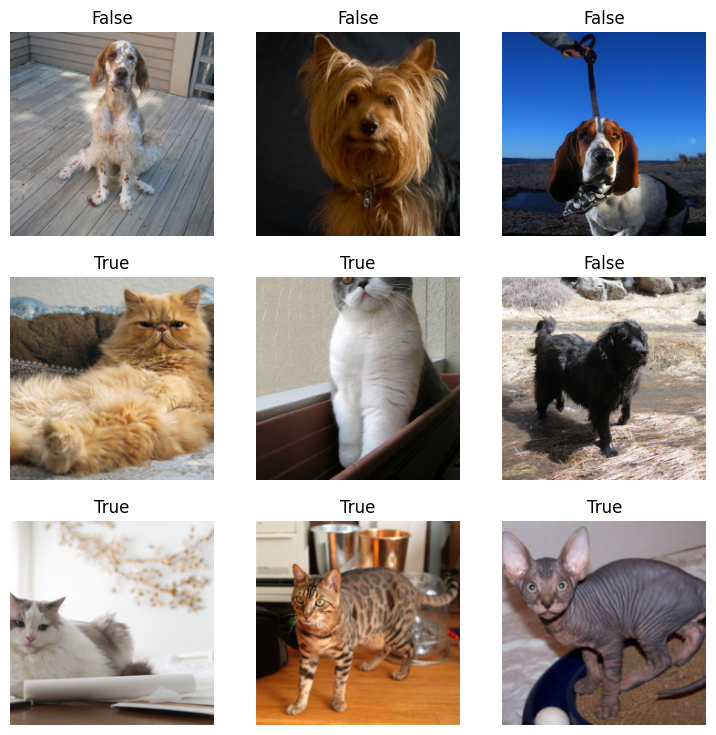

In [ ]:
dls.show_batch()

Then we can create a Learner, which is a fastai object that combines the data and a model for training, and uses transfer learning to fine tune a pretrained model in just two lines of code:

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.150823,0.023608,0.009472,00:23


epoch,train_loss,valid_loss,error_rate,time
0,0.053443,0.007796,0.002706,00:29


The first line downloaded a model called ResNet34, pretrained on ImageNet, and adapted it to our specific problem. It then fine tuned that model and in a relatively short time, we get a model with an error rate of well under 1%… amazing!

If you want to make a prediction on a new image, you can use learn.predict:

In [ ]:
learn.predict(files[0])

('False', tensor(0), tensor([9.9995e-01, 5.1299e-05]))

The predict method returns three things: the decoded prediction (here False for dog), the index of the predicted class and the tensor of probabilities of all classes in the order of their indexed labels(in this case, the model is quite confident about the being that of a dog). This method accepts a filename, a PIL image or a tensor directly in this case. We can also have a look at some predictions with the show_results method:

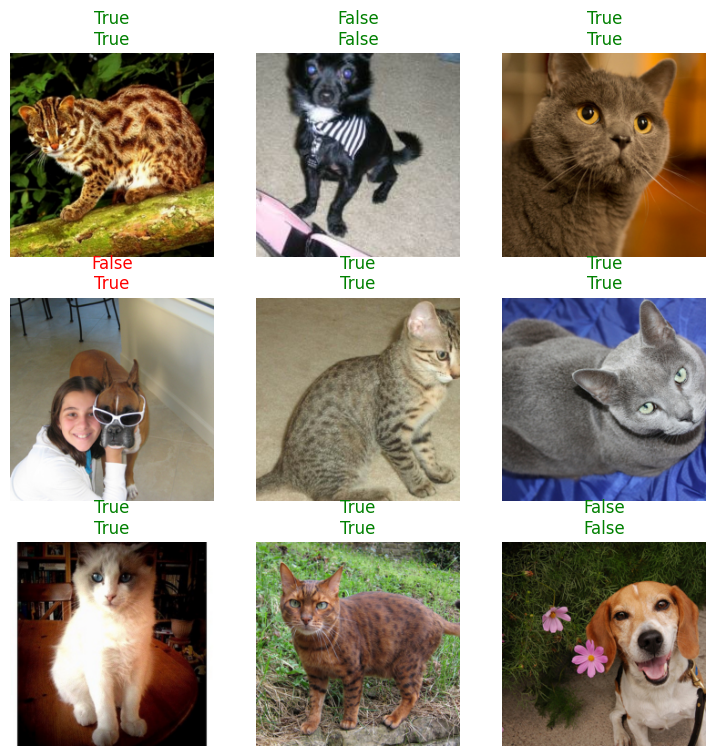

In [ ]:
learn.show_results()

From this, we can build a classifer for images of cats and dogs:

In [2]:
#| echo: false
#| output: asis
show_doc(CatOrDogImageClassifier)

---

[source](https://github.com/ninjalabo/nbdev-test/blob/main/nbdev_test/classifer.py#L59){target="_blank" style="float:right; font-size:smaller"}

### CatOrDogImageClassifier

>      CatOrDogImageClassifier (arch=<function resnet34>, metrics=<function
>                               error_rate>)

*Classifier between cat and dog images*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| arch | function | resnet34 | Pretrained model architecture |
| metrics | function | error_rate | Metrics to be used |

In [3]:
#| echo: false
#| output: asis
show_doc(CatOrDogImageClassifier.predict)

---

[source](https://github.com/ninjalabo/nbdev-test/blob/main/nbdev_test/classifer.py#L81){target="_blank" style="float:right; font-size:smaller"}

### CatOrDogImageClassifier.predict

>      CatOrDogImageClassifier.predict (file_path:str)

*Predict a single image with the learner*

## Tips

- **Module Packaging:** Each notebook will only export 1 module (or `.py` file), which is defined by directive `#| default_exp <file_name>`. However, it is possible to create sub-module with this directive. For instance, if the `file_name` is defined as `classifier.dog_and_cat`, then the created module will be exported to file `classifier/dog_and_cat.py` and a new directory `classifier` is automatically created in your main module directory.  
- **Notebook Packaging:** Each notebook will be automatically rendered into a Quarto Page. The order of the notebook is automatically inferred from the title (complying with naming convention: `01_notebook1.ipynb`, `02_notebook2.ipynb`. It is also possible to create sections in Quarto Pages by creating a new child directory in the `nbs` folder with the section name and adding corresponding notebooks to it. It is also possible to customize content structure by editing the `sidebar.yml` file.  
- **Jupyter Lab Support:** As we are creating module, it can be beneficial to have type hinting and code styling. Check https://chatgpt.com/share/67120f9f-6c58-8002-b10f-7c18d051d2f0 for how to enable such utilities, as well as customizing them for your own environment.